In [1]:
import numpy as np
import torch
from model import NtCNN

sequence = 37
features = 20
learning_rate = 0.001
batch_size = 64
num_class = 10
num_epoch = 30

device = "cuda" if torch.cuda.is_available() else "cpu"

model = NtCNN(sequence=sequence, features=features, num_class=num_class).to(device)
model.load_state_dict(torch.load("saved_dict//NtCNN_MALAYAGT_740Features_best_model.pth"))
model.eval()

train = np.load("MALAYAGT//train.npy", allow_pickle=True)

train = torch.from_numpy(train.astype(np.float32))

train[:, [12,13,14,15,16,17,18,19]] = 0

x_train = train[:, :-1]
y_train = train[:, -1]



Initializing NtCNN with sequence=37, features=20


/home/afifhaziq/miniconda3/envs/gatekeeperenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


start calculating shap
done


/tmp/ipykernel_41369/3140218388.py:21: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_value_global, background.cpu().numpy(), max_display=20)


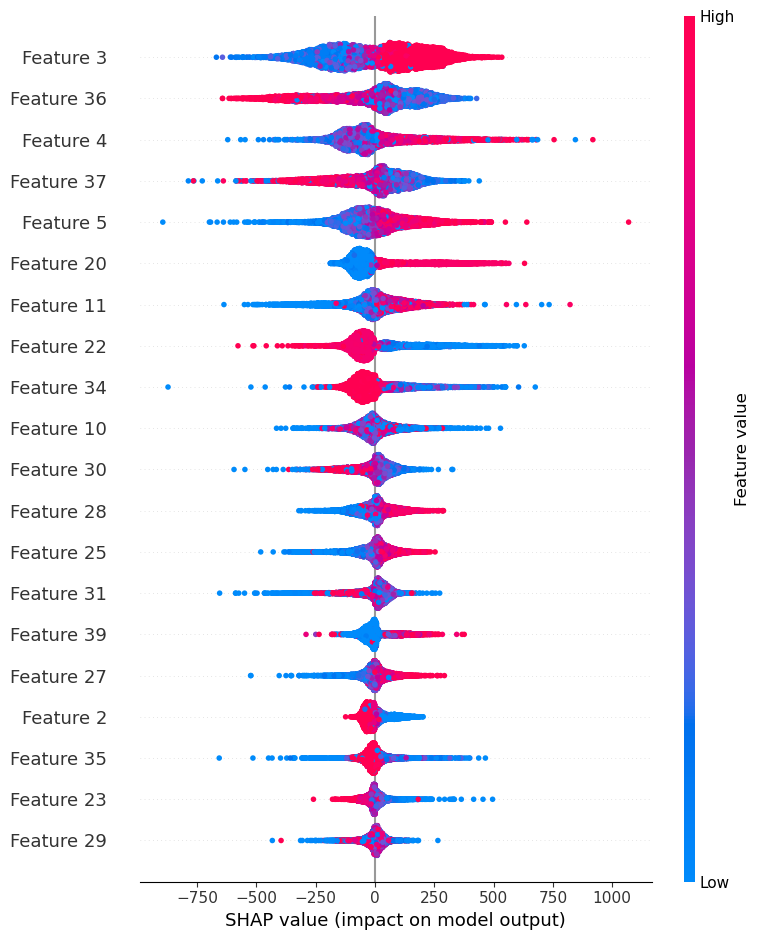

In [2]:
import shap

shap.initjs()

# Select the first n samples as background
background = x_train[:10000].to (device)

# Initialize GradientExplainer
explainer = shap.GradientExplainer(model, background)
print('start calculating shap')

# Compute SHAP values
shap_value = explainer.shap_values(background)
print('done')
# For multi-class, select SHAP values for a specific class, e.g., class 0
#shap_value = shap_value[3]

#global SHAP values
shap_value_global = shap_value.sum(axis=2)  # Sum over class dimension
 
shap.summary_plot(shap_value_global, background.cpu().numpy(), max_display=20)

In [ ]:
shap.summary_plot(shap_value_global, background.cpu().numpy(), max_display=20)

In [5]:
np.save('top740featuresMALAYAGT26May.npy', shap_value_global)